In [2]:
import pandas as pd
import folium
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../Datasets/Suburb.csv")
df.columns

Index(['OfficialNameSuburb', 'OfficialNameState',
       'OfficialCodeLocalGovernmentArea', 'OfficialCodeState', 'Latitude',
       'Longitude', 'GeoShape'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15334 entries, 0 to 15333
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OfficialNameSuburb               15334 non-null  object 
 1   OfficialNameState                15334 non-null  object 
 2   OfficialCodeLocalGovernmentArea  15334 non-null  object 
 3   OfficialCodeState                15334 non-null  object 
 4   Latitude                         15334 non-null  float64
 5   Longitude                        15334 non-null  float64
 6   GeoShape                         15333 non-null  object 
dtypes: float64(2), object(5)
memory usage: 838.7+ KB


In [5]:
# Remove one row that doesn't have the geoshape
df = df.dropna()

In [6]:
# Turn geoshape into dictionary for processing later
df['GeoShape'] = df['GeoShape'].apply(lambda x: ast.literal_eval(x))
df['Coordinate'] = [c for c in zip(df['Latitude'], df['Longitude'])]
coordinates = df['Coordinate'].to_list()

## Create map of suburbs as points
The map is cluttered when opened in browser

In [7]:
# Create a folium map centered at the centre of Australia
map_center = [-23.7000, 133.8800]
mymap = folium.Map(location=map_center, zoom_start=4.7)

# Create coordinates from the Latitude and Longitudes
coordinates = df['Coordinate'].to_list()

# Add each coordinate as a marker on the map
for coord in coordinates:
    folium.Marker(location=[coord[0], coord[1]], popup=f'({coord[0]}, {coord[1]})').add_to(mymap)

# Save the map to an HTML file
mymap.save("map_points.html")

# Display the map in a Jupyter Notebook (if using one). Better to display on website.
# display(mymap)


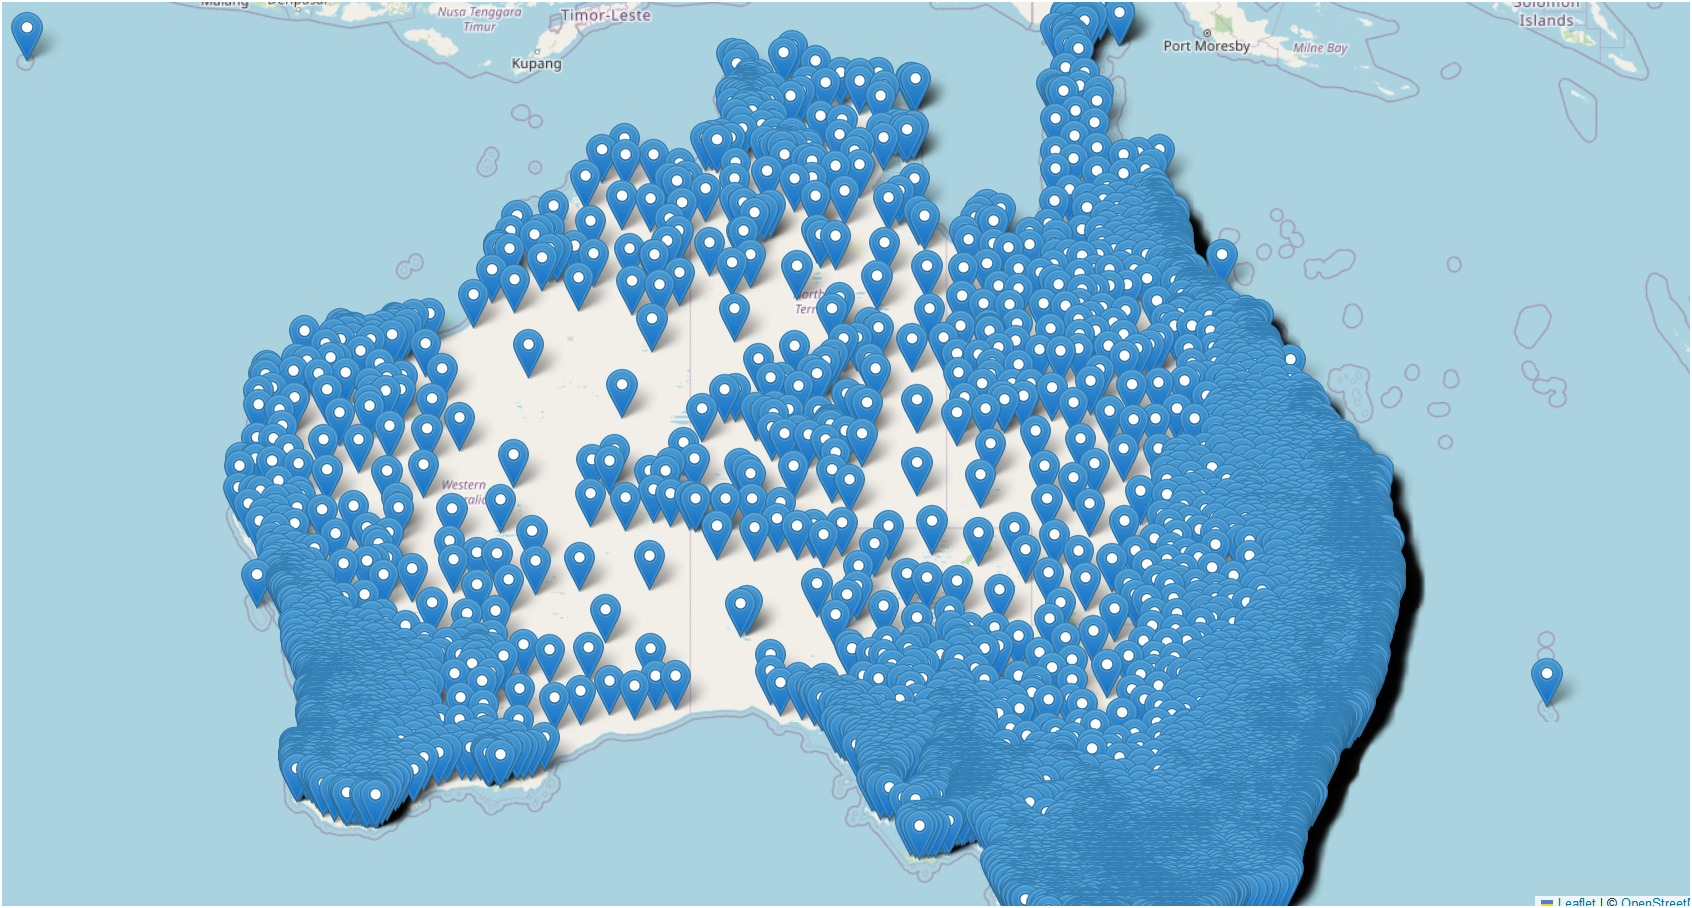

## Create map of suburbs as regions

In [8]:
# Create a folium map centered around the average of the coordinates
map_center = [-23.7000, 133.8800]
mymap = folium.Map(location=map_center, zoom_start=4.7)

# Add each GeoShape to the map
for geo_shape in df['GeoShape']:
    folium.GeoJson(geo_shape, name="geo_shape").add_to(mymap)

# Save the map to an HTML file
mymap.save("map_region.html")

# Display the map in a Jupyter Notebook (if using one)
# display(mymap)

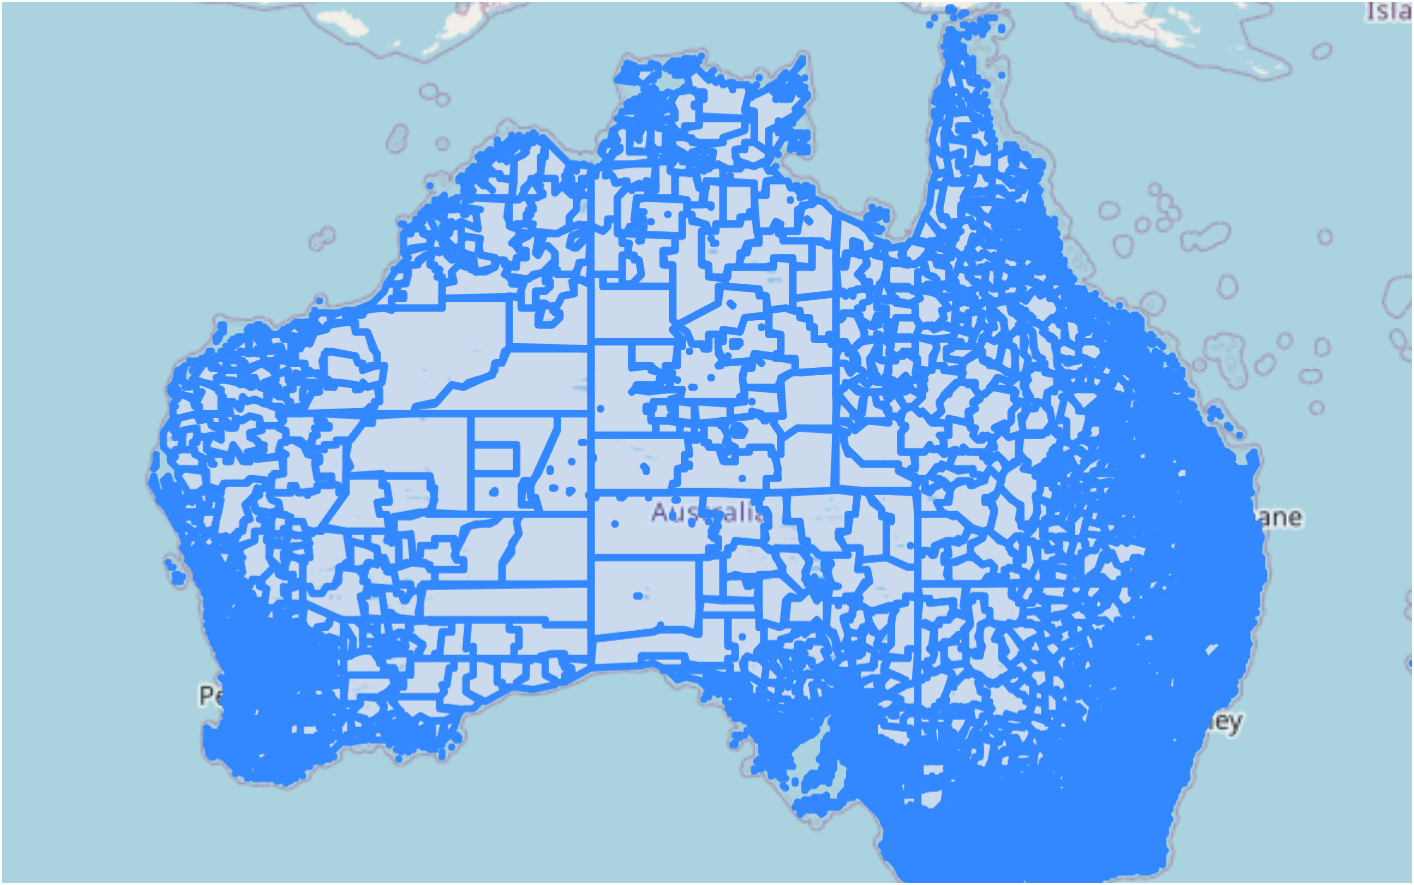

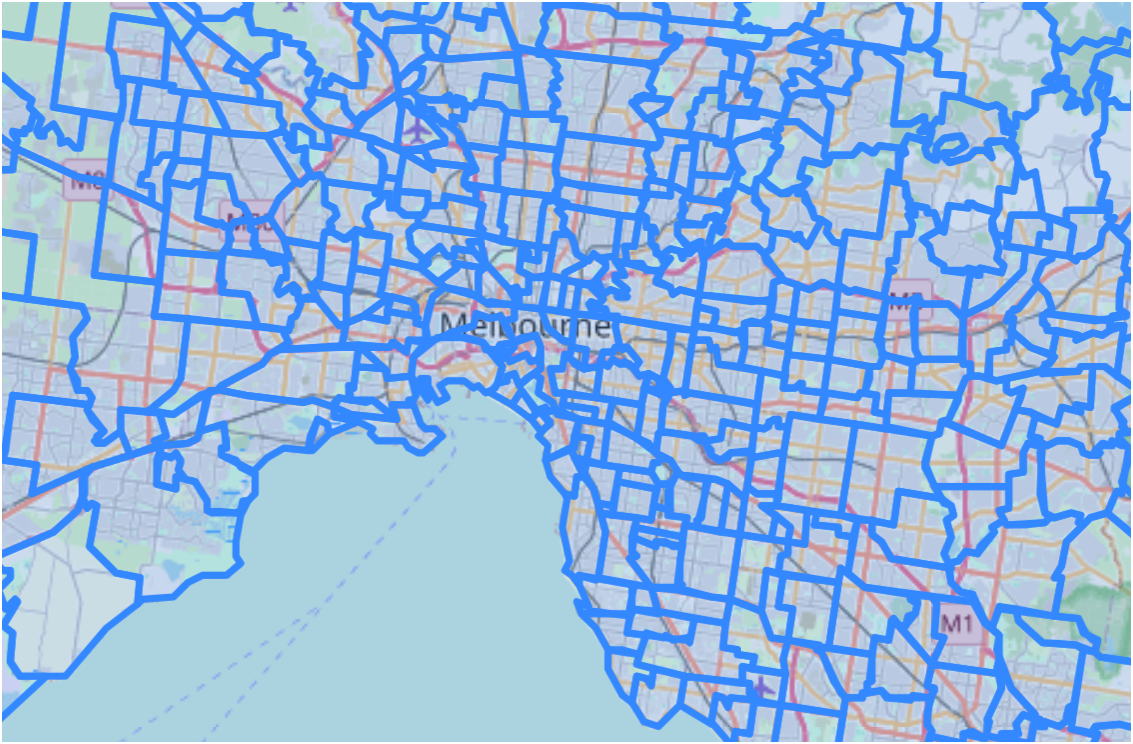

## Cluster Plot Function

In [9]:
def plot_clusters(df, cluster_name):
    # Generate a color palette
    unique_clusters = df[cluster_name].unique()
    palette = sns.color_palette("hsv", len(unique_clusters))

    # Create a dictionary mapping each cluster to a color
    cluster_color_map = {cluster: color for cluster, color in zip(unique_clusters, palette)}

    # Plot the points
    plt.figure(figsize=(10, 8))
    for cluster in unique_clusters:
        cluster_data = df[df[cluster_name] == cluster]
        plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], 
                    color=cluster_color_map[cluster], label=cluster, alpha=0.6, edgecolors='w', s=100)
    
    # Calculate and plot the center of each cluster
    for cluster in unique_clusters:
        cluster_data = df[df[cluster_name] == cluster]
        center_lat = cluster_data['Latitude'].mean()
        center_lon = cluster_data['Longitude'].mean()
        plt.plot(center_lon, center_lat, 'kX', markersize=2, markeredgewidth=1)
    
    # Add title and labels
    plt.title('Clustered Suburbs (1 Lat/Lon away is about 111Km)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Plot
    plt.show()

## Clustering - KMeans

In [10]:
from sklearn.cluster import KMeans
k = 1000
kmeans = KMeans(n_clusters=k, random_state=42).fit(coordinates)
df['KMeans'] = kmeans.labels_   

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

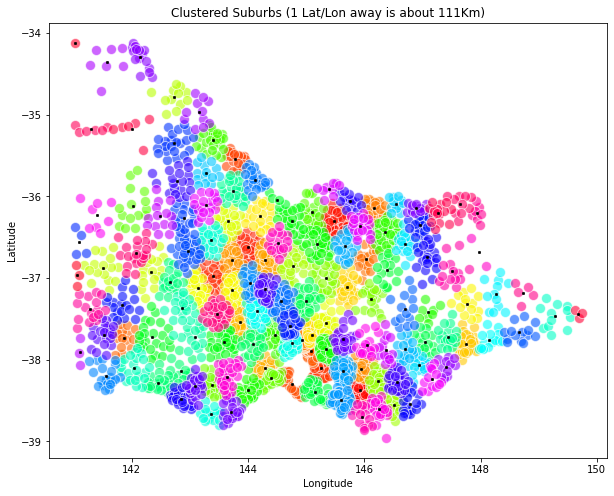

In [ ]:
victoria =  df[df.OfficialNameState=="Victoria"]
plot_clusters(victoria, 'KMeans')

In [ ]:
!pip install python-geohash

Defaulting to user installation because normal site-packages is not writeable
  Using cached python-geohash-0.8.5.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for python-geohash
Failed to build python-geohash


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-312
      copying geohash.py -> build\lib.win-amd64-cpython-312
      copying quadtree.py -> build\lib.win-amd64-cpython-312
      copying jpgrid.py -> build\lib.win-amd64-cpython-312
      copying jpiarea.py -> build\lib.win-amd64-cpython-312
      running build_ext
      building '_geohash' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for python-geohash
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (python

## GeoHash Clustering

In [ ]:
import geohash

# Encode to GeoHash
df['Geohash5'] = df.apply(lambda row: geohash.encode(row['Latitude'], row['Longitude'], precision=5), axis=1)
df['Geohash4'] = df['Geohash5'].str[:4]
df['Geohash3'] = df['Geohash5'].str[:3]


ModuleNotFoundError: No module named 'geohash'

In [ ]:
df.iloc[:, -3:].nunique()

Geohash5    12172
Geohash4     3178
Geohash3      379
dtype: int64

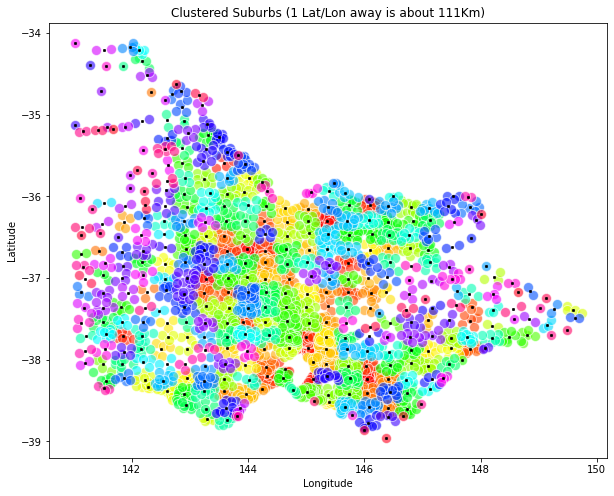

In [ ]:
victoria =  df[df.OfficialNameState=="Victoria"]
plot_clusters(victoria, "Geohash4")

## OPTICS

In [ ]:
from sklearn.cluster import OPTICS

# Create and fit the OPTICS model
optics = OPTICS(min_samples=3, metric='haversine')
clusters = optics.fit_predict(np.radians(df['Coordinate'].to_list()))  # Convert degrees to radians for 'haversine'
df['OPTICS'] = clusters

In [ ]:
victoria =  df[df.OfficialNameState=="Victoria"]
victoria.OPTICS.nunique()

251

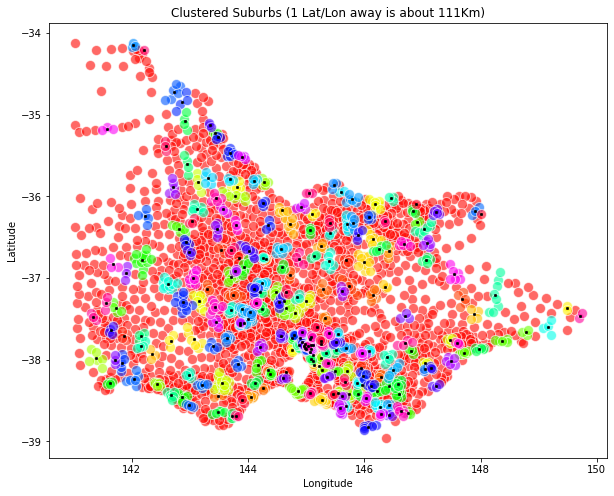

In [ ]:
victoria =  df[df.OfficialNameState=="Victoria"]
plot_clusters(victoria, "OPTICS")

## Grid-Based

In [11]:
# Define the grid cell size. xkm/111
cell_size = 40/111
lat_interval = cell_size  # Latitude interval 
lon_interval = cell_size # Longitude interval 

# Function to assign a point to a grid cell
def assign_to_grid(lat, lon, lat_interval, lon_interval):
    lat_grid = int(lat // lat_interval)
    lon_grid = int(lon // lon_interval)
    return (lat_grid, lon_grid)

# Assign each point to a grid cell
grid_cells = [assign_to_grid(lat, lon, lat_interval, lon_interval) for lat, lon in coordinates]

# Convert to DataFrame for easier manipulation
df['GridCell'] = grid_cells

# Group points by grid cell
grid_clusters = df.groupby('GridCell')

In [12]:
df.GridCell.nunique()

2051

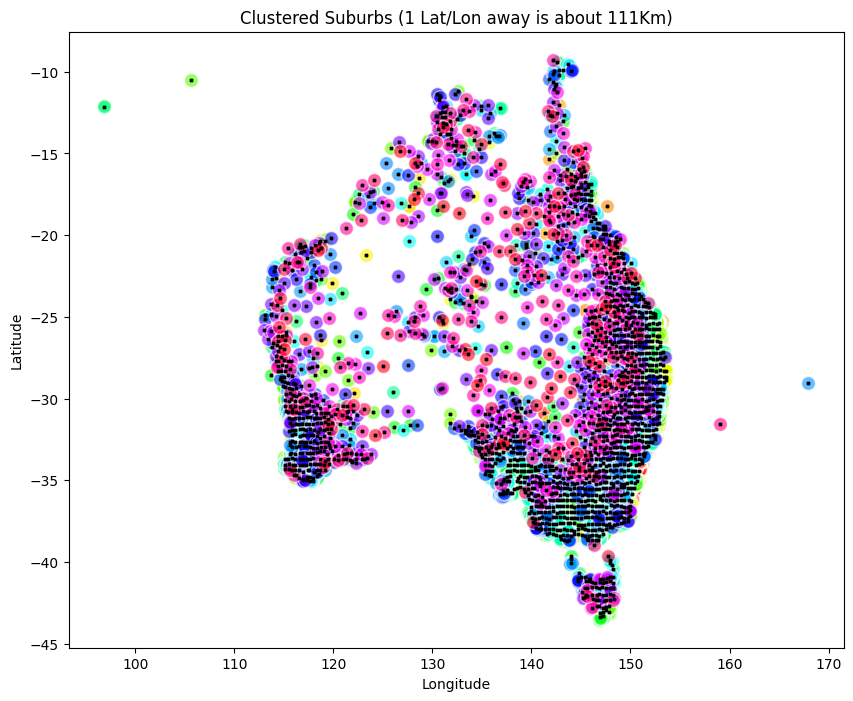

In [13]:
NSW =  df[df.OfficialNameState=="New South Wales"]
plot_clusters(df, 'GridCell')

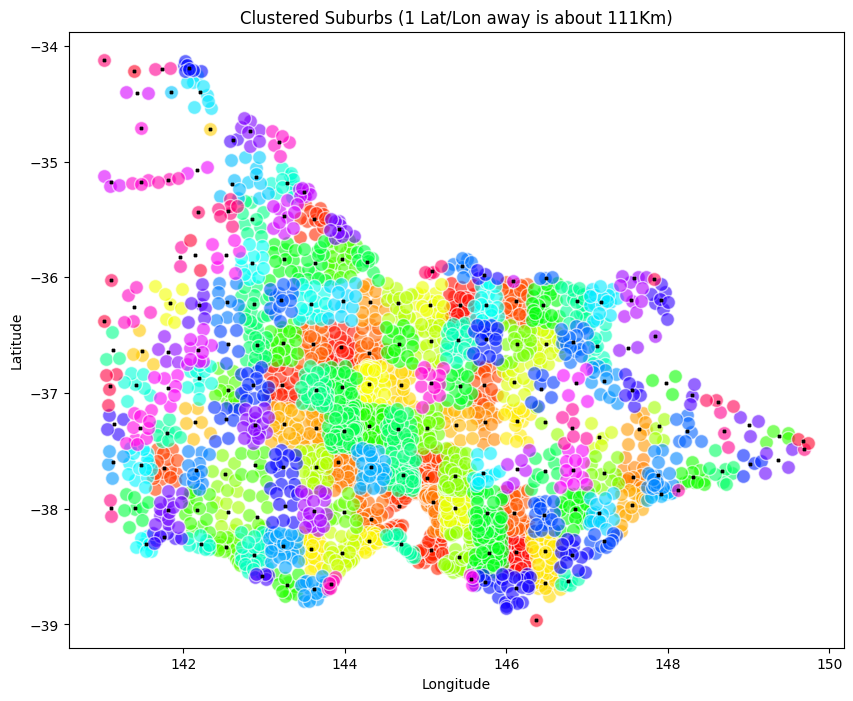

AttributeError: 'DataFrame' object has no attribute 'Gridcell'

In [19]:
victoria =  df[df.OfficialNameState=="Victoria"]
plot_clusters(victoria, 'GridCell')
print(victoria.Gridcell.nunique())



In [15]:
victoria.GridCell.nunique()

202

In [16]:
print(df.GridCell.nunique())

2051


## Create Dataset for Cluster

Grid-Based is the best due to its adjustability and uniform clustering

In [14]:
# Function to calculate the center of a grid cell
def grid_center(lat_grid, lon_grid, lat_interval, lon_interval):
    lat_center = (lat_grid + 0.5) * lat_interval
    lon_center = (lon_grid + 0.5) * lon_interval
    return [lat_center, lon_center]

In [17]:
cluster_id = df.GridCell.apply(lambda x: str(x[0])[1:] + str(x[1]))
cluster_centre = [grid_center(lat, lon, lat_interval, lon_interval) for lat,lon in df.GridCell]
cluster_centre = np.array(cluster_centre)

In [19]:
cluster_centre[:,0]

array([-35.85585586, -36.21621622, -32.97297297, ..., -35.4954955 ,
       -35.13513514, -35.13513514])

In [20]:
# Save cluster ids and its coordinate
df_cluster = pd.DataFrame()
df_cluster["ClusterID"] = cluster_id
df_cluster["Latitude"] = cluster_centre[:,0]
df_cluster["Longitude"]  = cluster_centre[:,1]
df_cluster = df_cluster.drop_duplicates()
df_cluster.to_csv("../Datasets/Clusters.csv", index=False)  

In [21]:
# Add cluster ids to the suburbs
df_output = pd.read_csv("../Datasets/Suburb.csv")
df_output = df_output.dropna()
df_output["ClusterID"] = cluster_id
df_output.to_csv("../Datasets/SuburbClustered.csv", index=False)  

In [47]:
df = pd.read_csv("../Datasets/SuburbClustered.csv")
df_cl = df[df.ClusterID == 82363  ]
df_cl

OfficialNameSuburb OfficialNameState OfficialCodeLocalGovernmentArea  \
11961       SA Remainder   South Australia                           44000   

      OfficialCodeState   Latitude   Longitude  \
11961                 4 -29.349802  130.962483   

                                                GeoShape  ClusterID  
11961  {"coordinates": [[[132.99810841300004, -29.452...      82363

In [54]:
df = pd.read_csv("../Datasets/WeatherData1400_1500.csv")
df_cll = pd.read_csv("../Datasets/SuburbClustered.csv")

df = pd.merge(df, df_cll[['ClusterID', 'OfficialNameState']], on='ClusterID', how='left')
print(df.head())
df.to_csv("../Datasets/WeatherData1400_1500.csv")  

   ClusterID                   Datetime  TemperatureMean  TemperatureMax  \
0      61406  1999-12-31 00:00:00+00:00        21.927500       26.082499   
1      61406  2000-01-01 00:00:00+00:00        26.213750       33.532500   
2      61406  2000-01-02 00:00:00+00:00        28.267916       34.882500   
3      61406  2000-01-03 00:00:00+00:00        28.490835       34.782500   
4      61406  2000-01-04 00:00:00+00:00        29.032500       34.882500   

   TemperatureMin  RainSum  RelativeHumidityMean  RelativeHumidityMax  \
0       20.182499      0.0             35.793068            40.922085   
1       19.182499      0.0             31.156197            45.634033   
2       22.782500      0.1             46.956707            89.046684   
3       22.932499      0.1             55.242508            80.173225   
4       23.032500      0.0             53.888584            85.574190   

   RelativeHumidityMin OfficialNameState  
0            30.989819        Queensland  
1            15.77